<a href="https://colab.research.google.com/github/Dev-hottae/PINC/blob/master/Mirae_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Drive Mount

# from google.colab import drive
# drive.mount("/content/drive")

In [375]:
# Package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

In [206]:
# change user PATH
user_path = r'C:\Users\dlagh\PycharmProjects\PINC\Mirae_data_research\data_set'

history_path = user_path + '\\trade_train.csv'
stocks_info_path = user_path + '\\stocks_price_history.csv'

In [353]:
# 데이터 불러오기
stocks_price_history = pd.read_csv(stocks_info_path, encoding='utf-8')
trade_history = pd.read_csv(history_path, encoding='utf-8')

In [354]:
trade_history

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,30195,202006,MAD48,163,A207940,Y,Y,3,4,3,3,835000,797000
30196,30196,202006,MAD48,163,A272210,Y,Y,3,3,90,42,9900,8870
30197,30197,202006,MAD48,163,A285130,Y,Y,6,4,271,162,109100,98000
30198,30198,202006,MAD48,163,A316140,Y,Y,5,4,386,735,10050,9920


In [355]:
# 종목별 누적 매수 고객수 확인
accumul_bid_custom_bycode = trade_history.groupby('종목번호').sum()[['매수고객수','매도고객수']].sort_values(by='매수고객수', ascending=False)
accumul_bid_custom_bycode

,매수고객수,매도고객수
종목번호,,
A005930,23707,17426
A000660,8649,8164
A035720,7395,6416
A005935,5719,3030
A005380,5297,4377
...,...,...
A038060,3,3
A091580,0,3
A290670,0,3


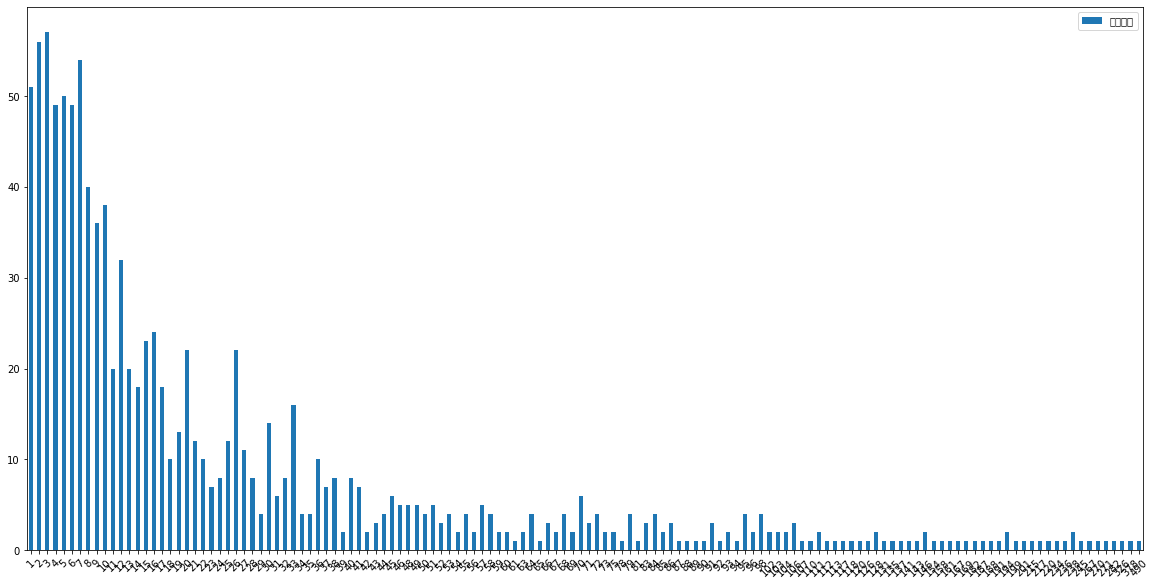

In [356]:
# 종목별 누적 매수 횟수 확인
trade_history['종목번호'].value_counts().to_frame()['종목번호'].value_counts().to_frame().sort_index().plot(kind="bar", figsize=(20,10), rot=45)

In [357]:
# 매수 종목으로 등장한 횟수 x 회 까지 제외
x = 0
bid_count = trade_history['종목번호'].value_counts().to_frame()
ex_stocks = bid_count[bid_count['종목번호'] <= x].index
ex_stocks

# 제외
trade_history_ex1 = trade_history[~trade_history['종목번호'].isin(ex_stocks)]
trade_history_ex1

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,30195,202006,MAD48,163,A207940,Y,Y,3,4,3,3,835000,797000
30196,30196,202006,MAD48,163,A272210,Y,Y,3,3,90,42,9900,8870
30197,30197,202006,MAD48,163,A285130,Y,Y,6,4,271,162,109100,98000
30198,30198,202006,MAD48,163,A316140,Y,Y,5,4,386,735,10050,9920


In [454]:
# 그래프를 위한 merge
graph_merge = trade_history_ex1.merge(stocks_info_stop[['종목번호','종목명']], how='left',left_on='종목번호', right_on="종목번호", suffixes=('', 'x'))
graph_merge

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값,종목명
0,0,201907,MAD01,288,A000660,Y,Y,7,17,19,234,74800,78500,SK하이닉스
1,1,201907,MAD01,288,A001820,Y,Y,3,4,533,154,47385,46700,삼화콘덴서
2,2,201907,MAD01,288,A004020,Y,Y,3,3,409,528,41411,40000,현대제철
3,3,201907,MAD01,288,A005380,Y,Y,4,3,323,451,140602,140628,현대차
4,4,201907,MAD01,288,A005930,Y,Y,13,19,34,101,45350,46850,삼성전자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,30195,202006,MAD48,163,A207940,Y,Y,3,4,3,3,835000,797000,삼성바이오로직스
30196,30196,202006,MAD48,163,A272210,Y,Y,3,3,90,42,9900,8870,한화시스템
30197,30197,202006,MAD48,163,A285130,Y,Y,6,4,271,162,109100,98000,SK케미칼
30198,30198,202006,MAD48,163,A316140,Y,Y,5,4,386,735,10050,9920,우리금융지주


In [515]:
graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201908)].sort_values(by='매수고객수', ascending=False).head(10)

,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값,종목명
1549,1549,201908,MAD02,112,A005930,Y,Y,4,3,205,205,43750,43900,삼성전자
1551,1551,201908,MAD02,112,A215600,Y,Y,4,3,176,105,10850,10900,신라젠
1548,1548,201908,MAD02,112,A000660,Y,Y,3,4,55,65,74300,77600,SK하이닉스
1550,1550,201908,MAD02,112,A035420,N,Y,0,3,0,34,-1,142000,NAVER


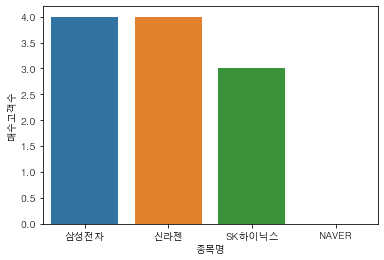

In [514]:
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201908)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수')


[Text(0, 0, '삼성전자'),
 Text(0, 0, 'SK텔레콤'),
 Text(0, 0, '삼성전자우'),
 Text(0, 0, '카카오'),
 Text(0, 0, 'NAVER'),
 Text(0, 0, 'KT'),
 Text(0, 0, '현대차'),
 Text(0, 0, 'SK하이닉스'),
 Text(0, 0, 'KB금융'),
 Text(0, 0, '셀트리온')]

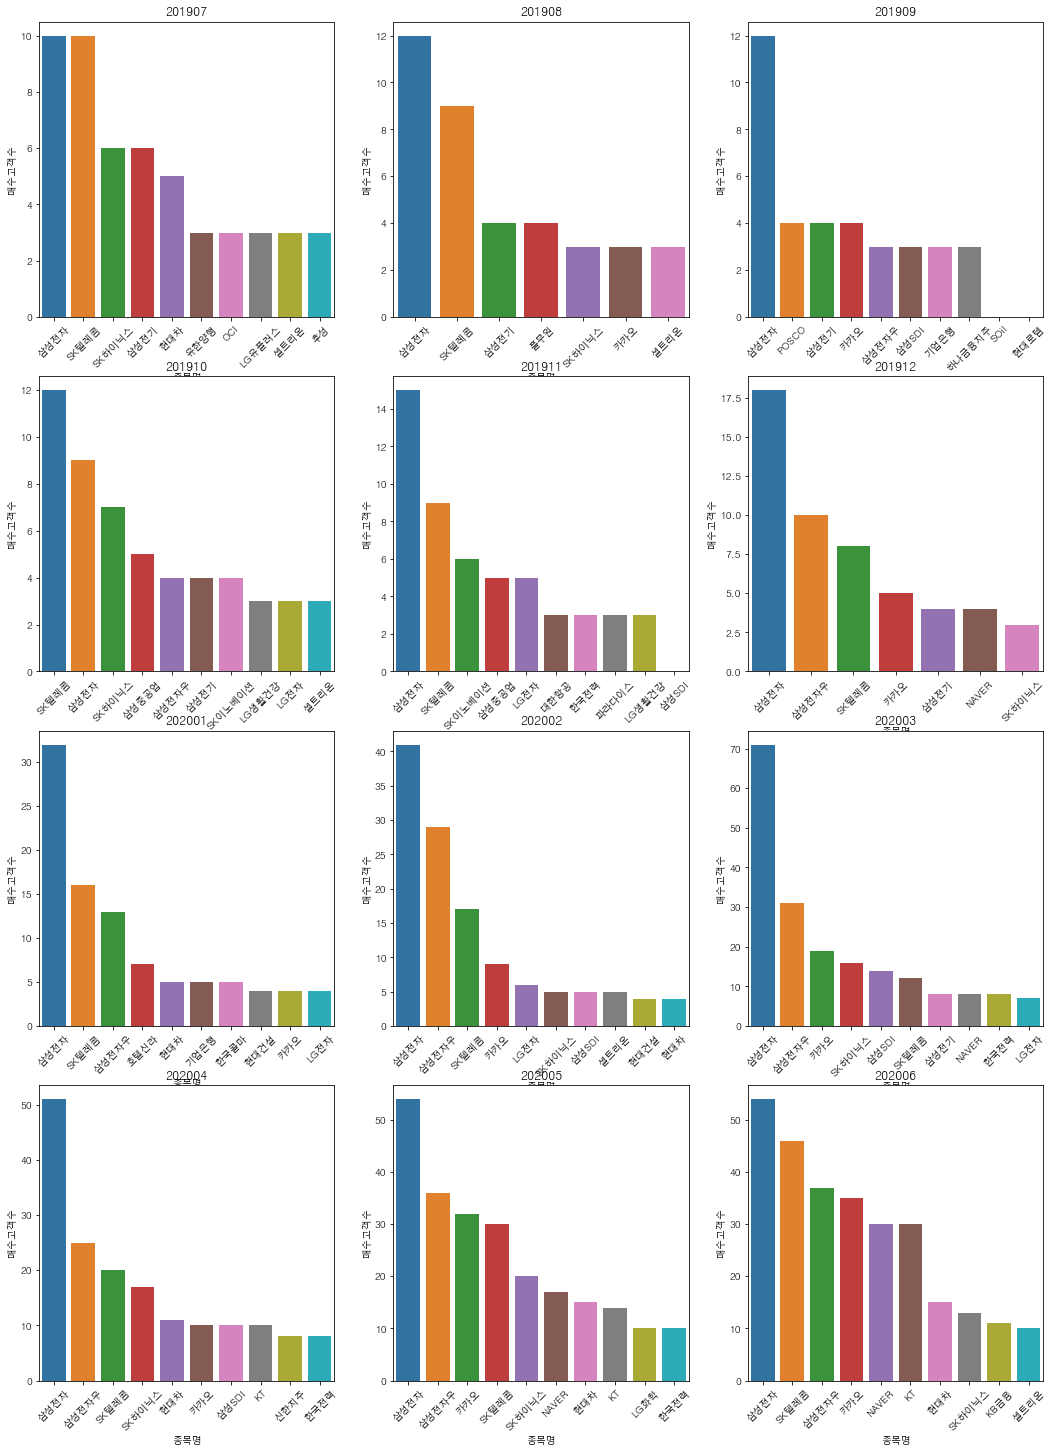

In [517]:
# 그룹 내 매수 변화 1년 그래프
#################### Visual Studio Code 전용 한글 폰트 적용 ###################
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
##############################################################################
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,25)

group = "MAD47"

sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201907)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax1)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201908)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax2)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201909)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax3)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201910)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax4)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201911)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax5)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==201912)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax6)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202001)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax7)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202002)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax8)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202003)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax9)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202004)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax10)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202005)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax11)
sns.barplot(data=graph_merge[(graph_merge['그룹번호']==group) & (graph_merge['기준년월']==202006)].sort_values(by='매수고객수', ascending=False).head(10), x='종목명', y='매수고객수', ax=ax12)


ax1.set(title="201907")
ax2.set(title="201908")
ax3.set(title="201909")
ax4.set(title="201910")
ax5.set(title="201911")
ax6.set(title="201912")
ax7.set(title="202001")
ax8.set(title="202002")
ax9.set(title="202003")
ax10.set(title="202004")
ax11.set(title="202005")
ax12.set(title="202006")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=45)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=45)
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=45)
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=45)
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=45)
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=45)
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=45)
ax11.set_xticklabels(ax11.get_xticklabels(),rotation=45)
ax12.set_xticklabels(ax12.get_xticklabels(),rotation=45)

In [359]:
# trade_history = trade_history[trade_history['매수고객수']>0]
# trade_history

In [360]:
# 그룹 내에서 거래가 1회 이상인 종목
traded_stocks = trade_history_ex1['종목번호'].unique()
len(traded_stocks)

1066

In [361]:
stocks_price_history

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286056,286056,20200728,A336370,두산솔루스,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37050,39150,37000,38150,1764085,6755086
286057,286057,20200728,A33637K,두산솔루스1우,N,코스피,제조업,통신장비 제조업,전자부품 제조업,18100,19350,17950,18250,302925,565624
286058,286058,20200728,A33637L,두산솔루스2우B,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37000,38650,36500,37700,59460,224214
286059,286059,20200728,A344820,케이씨씨글라스,N,코스피,제조업,비금속 광물제품 제조업,유리 및 유리제품 제조업,33500,33500,32250,32400,56962,186549


In [362]:
f_stock_price_history = stocks_price_history[stocks_price_history['종목번호'].isin(traded_stocks)]
f_stock_price_history

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286056,286056,20200728,A336370,두산솔루스,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37050,39150,37000,38150,1764085,6755086
286057,286057,20200728,A33637K,두산솔루스1우,N,코스피,제조업,통신장비 제조업,전자부품 제조업,18100,19350,17950,18250,302925,565624
286058,286058,20200728,A33637L,두산솔루스2우B,N,코스피,제조업,통신장비 제조업,전자부품 제조업,37000,38650,36500,37700,59460,224214
286059,286059,20200728,A344820,케이씨씨글라스,N,코스피,제조업,비금속 광물제품 제조업,유리 및 유리제품 제조업,33500,33500,32250,32400,56962,186549


In [363]:
# 종목 info
stocks_info = f_stock_price_history.drop_duplicates(subset=['종목번호'])[['종목번호','종목명','20년7월TOP3대상여부','시장구분','표준산업구분코드_대분류','표준산업구분코드_중분류','표준산업구분코드_소분류']]
stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업
...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업


In [364]:
# # 데이터 저장
# f_stock_price_history.to_csv("traded_stocks_info.csv")

In [365]:
stop_data = f_stock_price_history[f_stock_price_history['거래량']==0]['종목명'].value_counts().to_frame()
stop_data

,종목명
셀루메드,175
럭슬,118
내츄럴엔도텍,113
경남제약,108
포티스,94
...,...
한화우,1
루미마이크로,1
셀바스헬스케어,1
에이치엘비생명과학,1


In [366]:
# 거래정지 원인 파악을 위한
f_stock_price_history[(f_stock_price_history['종목명']=="흥아해운") & (f_stock_price_history['거래량']==0)]

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
196059,196059,20200330,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
197143,197143,20200331,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
198227,198227,20200401,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
199311,199311,20200402,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
200395,200395,20200403,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280691,280691,20200722,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
281778,281778,20200723,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
282865,282865,20200724,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
283952,283952,20200727,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0


In [367]:
# 거래정지횟수 데이터 추가
stocks_info_stop = stocks_info.merge(stop_data, how='left',left_on='종목명', right_index=True, suffixes=('', 'x')).rename(columns={'종목명x':'정지이력'})
stocks_info_stop['정지이력'].fillna(value=0, inplace=True)
stocks_info_stop

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0
...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0


In [368]:
# Y 항목중 거래정지이력 있는애들
stocks_info_stop[(stocks_info_stop['20년7월TOP3대상여부']=="Y") & (stocks_info_stop['정지이력']>0)]

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
17,A000885,한화우,Y,코스피,제조업,의약품 제외,기타 화학제품 제조업,1.0
147,A008060,대덕,Y,코스피,제조업,통신장비 제조업,전자부품 제조업,14.0
181,A010145,삼성중공우,Y,코스피,제조업,기타 운송장비 제조업,선박 및 보트 건조업,3.0
220,A014100,메디앙스,Y,코스닥,제조업,의약품 제외,기타 화학제품 제조업,89.0
256,A019170,신풍제약,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,4.0
335,A033250,체시스,Y,코스피,제조업,자동차 및 트레일러 제조업,자동차 신품 부품 제조업,1.0
511,A058110,멕아이씨에스,Y,코스닥,제조업,의료· 정밀· 광학기기 및 시계 제조업,의료용 기기 제조업,3.0
555,A066430,와이오엠,Y,코스닥,도매 및 소매업,도매 및 상품 중개업,기타 전문 도매업,1.0
724,A102940,코오롱생명과학,Y,코스닥,제조업,의료용 물질 및 의약품 제조업,기초 의약물질 및 생물학적 제제 제조업,1.0


In [426]:
from datetime import datetime
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import font_manager as fm, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
# 필요 함수 세팅

# 그룹과 일자 input 시 매수많이 일어난 top 추출함수
def which_is_top(group, date, top):
    data = trade_history[(trade_history['기준년월'] == date) & (trade_history['그룹번호'] == ("MAD"+group))]
    data = data.sort_values(by=["매수고객수"],ascending=False)
    data = data[data['매수고객수'] > 0][:top]

    data = data.merge(stocks_info, how="inner", on="종목번호")
    return data

# 종목명으로 종목코드 가져오기
def code_by_name(name):
    return stocks_info.loc[stocks_info['종목명'] == name]

# 종목코드로 종목명 가져오기
def name_by_code(code):
    return stocks_info.loc[stocks_info['종목번호'] == code]

def get_std(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (stocks_price_history['기준일자'] < end)]

    # 거래량 0 제거
    data = data[data['거래량'] > 0]
    print("데이터 갯수 : ",len(data))
    if len(data) == 0:
        stdrate_year = None
    else:
        year = 252
        avg = data['종목종가'].mean()
        std_day = (data['종목종가'].std()/avg)/np.sqrt(len(data))
        stdrate_year = std_day * np.sqrt(year) * 100
        print(data['종목명'].tolist()[0], stdrate_year)

    return stdrate_year

# 종목 모멘텀 구하기
def get_momentom(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (
                stocks_price_history['기준일자'] < end)]

    # 거래량 0 제거
#     data = data[data['거래량'] > 0]
    if (len(data) == 0):
        mom = None
    else:
        close_prices = data['종목종가'].tolist()
        # print(close_prices)
        mom = np.log(close_prices[-1]/close_prices[0])*100
        print(data['종목명'].tolist()[0], mom)
    return mom

# 가격변화률 구하기
def get_change_rate(code, start_month, end_month):
    print(code)
    stocks_price_history['기준일자'] = pd.to_datetime(stocks_price_history['기준일자'], format="%Y%m%d")

    start = start_month
    end = end_month

    # 지정종목, 기간 데이터 추출
    data = stocks_price_history[(stocks_price_history['종목번호'] == code) & (stocks_price_history['기준일자'] >= start) & (
                stocks_price_history['기준일자'] < end)]
    if(len(data)==0):
        return None
    else:
        start_price = data['종목종가'].tolist()[0]
        lowest_price = data['종목종가'].min()
        highest_price = data['종목종가'].max()

        # , np.log(highest_price/start_price)*100
        return np.log(lowest_price/start_price)*100
    


In [370]:
stocks_info = stocks_info_stop
stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0
...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0


In [422]:
# stocks_info['변동성_현월'] = 0
# stocks_info['변동성_전월'] = 0

# stocks_info['모멘텀_1'] = 0
# stocks_info['모멘텀_3'] = 0

stocks_info['최고상승율_현월'] = 0
stocks_info['최고하락율_현월'] = 0
stocks_info['최고상승율_전월'] = 0
stocks_info['최고하락율_전월'] = 0

stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,0,0,0,0
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,0,0,0,0
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,0,0,0,0
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,0,0,0,0
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,0,0,0,0
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,0,0,0,0
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,0,0,0,0
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [372]:
# 종목체크
stocks_price_history[stocks_price_history['종목명']=="흥아해운"]

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
65,65,20190701,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,610,666,605,620,2104918,132857
1092,1092,20190702,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,620,620,609,612,693009,42483
2119,2119,20190703,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,619,620,600,604,708560,43082
3146,3146,20190704,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,604,606,589,592,724354,43122
4173,4173,20190705,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,599,601,583,592,613155,36072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280691,280691,20200722,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
281778,281778,20200723,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
282865,282865,20200724,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0
283952,283952,20200727,A003280,흥아해운,N,코스피,운수 및 창고업,수상 운송업,해상 운송업,0,0,0,258,0,0


In [427]:
target_date = 202001
check_date = 201912
start = datetime.strptime(str(check_date), '%Y%m')
end = datetime.strptime(str(target_date), '%Y%m')

# stocks_info['변동성_현월'] = stocks_info['종목번호'].apply(lambda x: get_std(x, start, end))
# stocks_info['변동성_전월'] = stocks_info['종목번호'].apply(lambda x: get_std(x, start-relativedelta(months=+1), end-relativedelta(months=+1)))

# stocks_info['모멘텀_1'] = stocks_info['종목번호'].apply(lambda x: get_momentom(x, start, end))
# stocks_info['모멘텀_3'] = stocks_info['종목번호'].apply(lambda x: get_momentom(x, start-relativedelta(months=+2), end))

stocks_info['최고하락율_현월'] = stocks_info['종목번호'].apply(lambda x: get_change_rate(x, start, end))
stocks_info['최고하락율_전월'] = stocks_info['종목번호'].apply(lambda x: get_change_rate(x, start-relativedelta(months=+1), end-relativedelta(months=+1)))

A000020
A000080
A000100
A000120
A000140
A000145
A000150
A000210
A000220
A000250
A000270
A000440
A000520
A000660
A000720
A000810
A000880
A000885
A000890
A000910
A000990
A001000
A001040
A001060
A001120
A001140
A001200
A001210
A001230
A001260
A001340
A001360
A001440
A001510
A001520
A001540
A001550
A001680
A001740
A001820
A001840
A002020
A002070
A002100
A002140
A002210
A002320
A002360
A002410
A002630
A002700
A002720
A002760
A002780
A002790
A002800
A002900
A003000
A003010
A003060
A003090
A003220
A003230
A003280
A003350
A003410
A003490
A003495
A003520
A003550
A003560
A003620
A003670
A003680
A003850
A004020
A004060
A004100
A004140
A004170
A004270
A004310
A004370
A004410
A004430
A004540
A004650
A004710
A004720
A004770
A004800
A004830
A004835
A004870
A004980
A004990
A00499K
A005070
A005110
A005180
A005290
A005320
A005360
A005380
A005385
A005390
A005420
A005490
A005500
A005690
A005860
A005870
A005930
A005935
A005940
A005950
A006050
A006060
A006090
A006120
A006125
A006280
A006360
A006400
A006405


A336260
A33626K
A33626L
A336370
A33637K
A33637L
A318010
A317870
A272110
A317530
A322180
A084850
A214260
A272210
A216080
A322000
A103840
A190650
A297090
A321550
A308170
A278650
A290510
A124560
A322510
A226330
A235980
A288330
A327260
A344820
A294630
A294140
A274090
A204270
A237820
A198080
A353810
A298060
A297890
A000020
A000080
A000100
A000120
A000140
A000145
A000150
A000210
A000220
A000250
A000270
A000440
A000520
A000660
A000720
A000810
A000880
A000885
A000890
A000910
A000990
A001000
A001040
A001060
A001120
A001140
A001200
A001210
A001230
A001260
A001340
A001360
A001440
A001510
A001520
A001540
A001550
A001680
A001740
A001820
A001840
A002020
A002070
A002100
A002140
A002210
A002320
A002360
A002410
A002630
A002700
A002720
A002760
A002780
A002790
A002800
A002900
A003000
A003010
A003060
A003090
A003220
A003230
A003280
A003350
A003410
A003490
A003495
A003520
A003550
A003560
A003620
A003670
A003680
A003850
A004020
A004060
A004100
A004140
A004170
A004270
A004310
A004370
A004410
A004430
A004540


A294870
A298040
A298050
A298380
A298690
A299660
A299900
A302430
A302550
A303030
A305090
A307930
A308100
A312610
A316140
A317320
A319660
A289010
A234340
A300080
A241840
A317850
A313760
A148150
A318000
A317330
A282880
A228670
A317830
A286750
A195500
A311390
A256150
A317120
A244460
A234690
A158430
A300120
A336260
A33626K
A33626L
A336370
A33637K
A33637L
A318010
A317870
A272110
A317530
A322180
A084850
A214260
A272210
A216080
A322000
A103840
A190650
A297090
A321550
A308170
A278650
A290510
A124560
A322510
A226330
A235980
A288330
A327260
A344820
A294630
A294140
A274090
A204270
A237820
A198080
A353810
A298060
A297890


In [428]:
# stocks_info.drop(columns=['최고상승률_현월', '최고하락율_현월','최고상승률_전월','최고하락율_전월'], inplace=True)

In [440]:
stocks_info

,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,정지이력,변동성_현월,변동성_전월,모멘텀_1,모멘텀_3,최고상승율_현월,최고하락율_현월,최고상승율_전월,최고하락율_전월
0,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,9.192805,6.325298,2.436174,2.559555,2.436174,-6.758467,7.438372,0.000000
1,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,0.0,7.131278,7.010732,4.225981,5.492966,4.398246,-2.734902,4.497011,-3.819909
2,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,3.0,15.925354,2.924712,9.066980,3.004518,13.005313,-0.231750,0.681047,-2.537622
3,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,0.0,4.959833,4.907247,0.647251,8.408312,1.929320,-3.300630,4.652002,-0.317965
4,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,0.0,8.045202,10.135311,2.687302,16.877733,2.687302,-4.781787,4.930576,-5.949710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183938,A237820,플레이디,N,코스닥,전문· 과학 및 기술 서비스업,전문서비스업,광고업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186020,A198080,엔피디,N,코스닥,제조업,통신장비 제조업,전자부품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245858,A353810,이지바이오,Y,코스닥,제조업,식료품 제조업,동물용 사료 및 조제식품 제조업,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254499,A298060,에스씨엠생명과학,N,코스닥,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
# None 데이터 종합
stocks_info.isnull().sum()

종목번호              0
종목명               0
20년7월TOP3대상여부     0
시장구분              0
표준산업구분코드_대분류      0
표준산업구분코드_중분류      0
표준산업구분코드_소분류      0
정지이력              0
변동성_현월           12
변동성_전월           19
모멘텀_1            10
모멘텀_3            10
최고상승율_현월         10
최고하락율_현월         10
최고상승율_전월         16
최고하락율_전월         16
dtype: int64

In [436]:
# 재무정보 로드
fin_data_path = r'C:\Users\dlagh\Downloads\재무정보.csv'

In [437]:
fin_data = pd.read_csv(fin_data_path, encoding='utf-8')
fin_data

,종목번호,상장주식수,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_당기순이익,201909_당기순이익,201912_당기순이익,202003_당기순이익,202006_당기순이익,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율
0,000020,"27,931,470",749,742,833,670,698,-9,7,78,...,-6,2,79,23,67,27.83,27.42,24.98,25.61,24.78
1,000080,"70,133,611",5244,5291,5586,5339,5816,106,492,327,...,-292,258,-252,334,349,216.79,209.50,216.58,256.41,305.21
2,000100,"66,856,810",3594,3823,3937,3133,4155,-54,33,85,...,57,126,27,1154,343,28.13,29.48,28.32,29.92,32.64
3,000120,"22,812,344",25348,26218,28257,25154,26500,718,887,1013,...,176,130,328,114,362,158.94,159.02,149.23,154.80,153.73
4,000140,"23,206,765",5221,5267,5566,5315,5797,148,518,353,...,-306,235,-166,279,369,288.38,280.42,290.48,327.01,377.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,237820,"12,827,140",NaN,88,86,77,72,NaN,15,19,...,NaN,11,15,5,1,NaN,122.35,140.76,64.29,52.63
1083,198080,"21,535,185",NaN,799,718,641,406,NaN,86,57,...,NaN,72,21,10,5,NaN,294.96,254.37,141.20,108.36
1084,353810,"2,286,728",NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,198.39
1085,298060,"11,858,116",NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,-39,-104,NaN,NaN,NaN,79.99,18.12


In [435]:
# 직전분기 재무정보가져오기
# 종목번호 앞에 A 붙이기
fin_data['종목번호'] = "A"+fin_data['종목번호']


,종목번호,상장주식수,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_당기순이익,201909_당기순이익,201912_당기순이익,202003_당기순이익,202006_당기순이익,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율
0,A000020,"27,931,470",749,742,833,670,698,-9,7,78,...,-6,2,79,23,67,27.83,27.42,24.98,25.61,24.78
1,A000080,"70,133,611",5244,5291,5586,5339,5816,106,492,327,...,-292,258,-252,334,349,216.79,209.50,216.58,256.41,305.21
2,A000100,"66,856,810",3594,3823,3937,3133,4155,-54,33,85,...,57,126,27,1154,343,28.13,29.48,28.32,29.92,32.64
3,A000120,"22,812,344",25348,26218,28257,25154,26500,718,887,1013,...,176,130,328,114,362,158.94,159.02,149.23,154.80,153.73
4,A000140,"23,206,765",5221,5267,5566,5315,5797,148,518,353,...,-306,235,-166,279,369,288.38,280.42,290.48,327.01,377.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,A237820,"12,827,140",NaN,88,86,77,72,NaN,15,19,...,NaN,11,15,5,1,NaN,122.35,140.76,64.29,52.63
1083,A198080,"21,535,185",NaN,799,718,641,406,NaN,86,57,...,NaN,72,21,10,5,NaN,294.96,254.37,141.20,108.36
1084,A353810,"2,286,728",NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,198.39
1085,A298060,"11,858,116",NaN,NaN,NaN,-,1,NaN,NaN,NaN,...,NaN,NaN,NaN,-39,-104,NaN,NaN,NaN,79.99,18.12


In [275]:
fin_data['201906_매출'].isna().sum()

49

In [276]:
drop_fin_data = fin_data.dropna()
drop_fin_data

,종목번호,상장주식수,201906_매출,201909_매출,201912_매출,202003_매출,202006_매출,201906_영업이익,201909_영업이익,201912_영업이익,...,201906_당기순이익,201909_당기순이익,201912_당기순이익,202003_당기순이익,202006_당기순이익,201906_부채비율,201909_부채비율,201912_부채비율,202003_부채비율,202006_부채비율
0,000020,"27,931,470",749,742,833,670,698,-9,7,78,...,-6,2,79,23,67,27.83,27.42,24.98,25.61,24.78
1,000080,"70,133,611",5244,5291,5586,5339,5816,106,492,327,...,-292,258,-252,334,349,216.79,209.50,216.58,256.41,305.21
2,000100,"66,856,810",3594,3823,3937,3133,4155,-54,33,85,...,57,126,27,1154,343,28.13,29.48,28.32,29.92,32.64
3,000120,"22,812,344",25348,26218,28257,25154,26500,718,887,1013,...,176,130,328,114,362,158.94,159.02,149.23,154.80,153.73
4,000140,"23,206,765",5221,5267,5566,5315,5797,148,518,353,...,-306,235,-166,279,369,288.38,280.42,290.48,327.01,377.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,244460,"15,969,001",1,3,9,16,9,-37,-59,-60,...,-33,-84,-290,-64,-74,-262.05,123.48,191.28,285.28,633.68
1055,317870,"7,485,555",27,27,18,22,22,5,5,-3,...,-,5,-1,-1,1,90.73,83.86,39.85,39.29,30.24
1060,214260,"8,416,416",48,54,36,58,33,4,7,-16,...,7,10,-16,9,-25,59.73,96.69,31.20,30.79,32.74
1073,226330,"13,242,016",1,1,1,1,1,-15,-14,-15,...,-195,-13,-14,-13,-17,4.88,5.91,3.98,4.26,6.68
